In [98]:
from skimage.morphology import label, closing, disk, remove_small_holes, remove_small_objects
from skimage.filters import threshold_otsu, sobel
from skimage.segmentation import expand_labels
from skimage.restoration import denoise_nl_means
from skimage import img_as_float32

import tifffile
import matplotlib.pyplot as plt
import numpy

In [74]:
paths = [
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/500_Ch1.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/500_Ch4.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/500_Ch6.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/500_Ch7.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/500_Ch11.ome.tif"
]

In [79]:
paths = [
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/1000_Ch1.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/1000_Ch4.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/1000_Ch6.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/1000_Ch7.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/1000_Ch11.ome.tif"
]

In [143]:
paths = [
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/1100_Ch1.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/1100_Ch4.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/1100_Ch6.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/1100_Ch7.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/1100_Ch11.ome.tif"
]

In [89]:
paths = [
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/2000_Ch1.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/2000_Ch4.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/2000_Ch6.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/2000_Ch7.ome.tif",
    "/data/Experiment_data/weizmann/EhV/high_time_res/High/images/H1_T8_subset/2000_Ch11.ome.tif"
]

In [144]:
pixels = tifffile.imread(paths)
pixels = img_as_float32(pixels)

TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER
TiffTag 266: 0 is not a valid FILLORDER


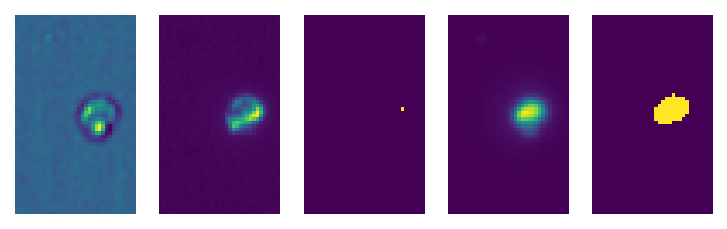

In [145]:
fig, axes = plt.subplots(1, len(pixels), dpi=150)
for p, ax in zip(pixels, axes):
    ax.imshow(p)
    ax.set_axis_off()

In [172]:
masked = numpy.empty_like(pixels)
for i in range(len(pixels)):
    x = pixels[i]
    
    x = sobel(x)
    x = closing(x, selem=disk(4))
    x = threshold_otsu(x) < x
    x = remove_small_holes(x, area_threshold=300)
    x = remove_small_objects(x, min_size=20)
    x = label(x)
    
    masked[i] = x

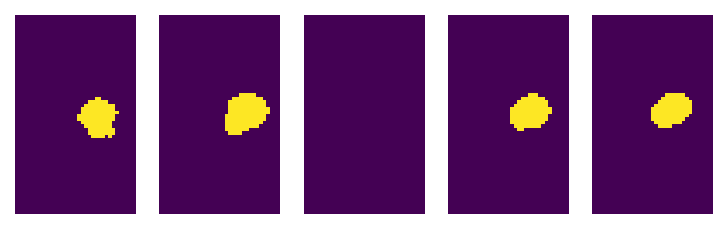

In [173]:
fig, axes = plt.subplots(1, len(pixels), dpi=150)
for p, ax in zip(masked, axes):
    ax.imshow(p)
    ax.set_axis_off()